In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("APY.csv")
df.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007.0,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007.0,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008.0,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008.0,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009.0,Autumn,4153.0,3120.0,0.75


In [3]:
df.shape

(224487, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224487 entries, 0 to 224486
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       224487 non-null  object 
 1   District    224487 non-null  object 
 2   Crop        224486 non-null  object 
 3   Crop_Year   224486 non-null  float64
 4   Season      224486 non-null  object 
 5   Area        224486 non-null  float64
 6   Production  220962 non-null  float64
 7   Yield       224486 non-null  float64
dtypes: float64(4), object(4)
memory usage: 13.7+ MB


In [5]:
df.describe()

,Crop_Year,Area,Production,Yield
count,224486.000000,224486.000000,2.209620e+05,224486.000000
mean,2008.778694,10758.158971,1.052576e+06,66.710298
std,6.500504,35117.640390,2.325305e+07,770.153343
min,1997.000000,0.004000,0.000000e+00,0.000000
25%,2003.000000,90.000000,1.000000e+02,0.510000
50%,2009.000000,581.000000,7.570000e+02,1.000000
75%,2014.000000,4112.000000,6.869000e+03,2.290000
max,2019.000000,877029.000000,1.452725e+09,43958.330000


In [6]:
crop_data=pd.get_dummies(data=df)

In [7]:
crop_data.head()

,Crop_Year,Area,Production,Yield,State_Andaman and Nicobar Island,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_CHANDIGARH,...,Crop_Turmeric,Crop_Urad,Crop_Wheat,Crop_other oilseeds,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,2007.0,2439.6,3415.0,1.40,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2007.0,1626.4,2277.0,1.40,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2008.0,4147.0,3060.0,0.74,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,2008.0,4147.0,2660.0,0.64,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2009.0,4153.0,3120.0,0.75,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [9]:
crop_data.isnull().sum()

Crop_Year                              1
Area                                   1
Production                          3525
Yield                                  1
State_Andaman and Nicobar Island       0
                                    ... 
Season_Kharif                          0
Season_Rabi                            0
Season_Summer                          0
Season_Whole Year                      0
Season_Winter                          0
Length: 561, dtype: int64

In [10]:
crop_data.dropna(inplace=True)

In [11]:
crop_data.isnull().sum()

Crop_Year                           0
Area                                0
Production                          0
Yield                               0
State_Andaman and Nicobar Island    0
                                   ..
Season_Kharif                       0
Season_Rabi                         0
Season_Summer                       0
Season_Whole Year                   0
Season_Winter                       0
Length: 561, dtype: int64

CROP PRODUCTION PREDICTION

In [12]:
X=crop_data.drop(['Production'],axis=1)
Y=crop_data['Production']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression
mdl=LinearRegression()

In [15]:
mdl.fit(X_train,Y_train)

LinearRegression()

In [16]:
pred=mdl.predict(X_train)

In [17]:
pred

array([-1715505.29201208,   442060.62678823, -1159702.3079975 , ...,
         171366.01155081, -2913913.71609187,  -430495.38645641])

In [18]:
mdl.score(X_train,Y_train)

0.27111198158741445

In [19]:
pred1=mdl.predict(X_test)

In [20]:
mdl.score(X_test,Y_test)

0.2710331141238814

In [21]:
pred1

array([-1976704.38858994, -4997769.85313553,   132549.97682273, ...,
         215978.63683308,   298039.63810761, -2149352.60291551])

BEST STATES FOR GROWING A PARTICULAR CROP

In [22]:
crop = input('\nEnter name of the crop:')
crop_prod = df[df['Crop'] == crop]


Enter name of the crop:Rice


In [23]:
crop_prod

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
468,Andaman and Nicobar Island,NICOBARS,Rice,2007.0,Kharif,7333.75,21864.0,2.98
469,Andaman and Nicobar Island,NICOBARS,Rice,2008.0,Autumn,7900.00,14730.0,1.86
470,Andaman and Nicobar Island,NICOBARS,Rice,2009.0,Autumn,8140.00,16600.0,2.04
471,Andaman and Nicobar Island,NICOBARS,Rice,2000.0,Kharif,102.00,321.0,3.15
472,Andaman and Nicobar Island,NICOBARS,Rice,2001.0,Kharif,83.00,300.0,3.61
...,...,...,...,...,...,...,...,...
224007,Odisha,SUNDARGARH,Rice,2018.0,Summer,240.00,530.0,2.21
224008,Odisha,SUNDARGARH,Rice,2018.0,Winter,98650.00,132090.0,1.34
224009,Odisha,SUNDARGARH,Rice,2019.0,Autumn,78090.00,116660.0,1.49
224010,Odisha,SUNDARGARH,Rice,2019.0,Summer,1040.00,1440.0,1.38


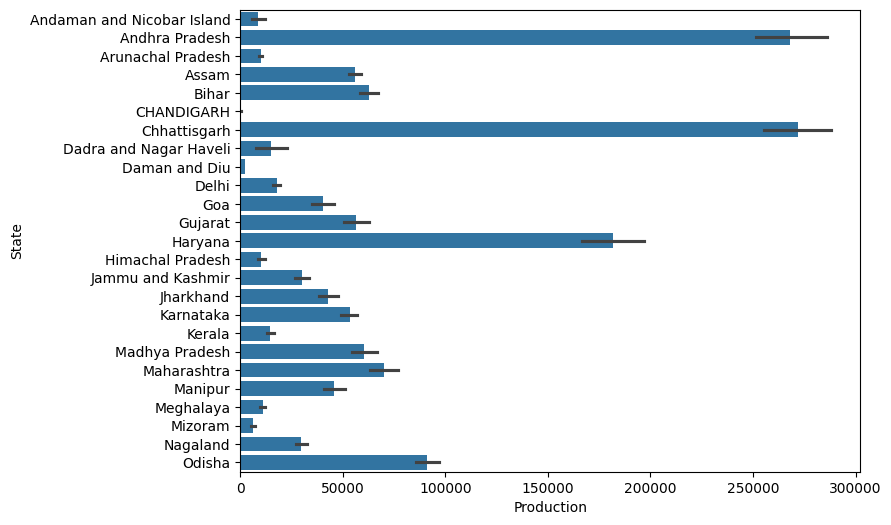

In [24]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(data=crop_prod,x='Production',y='State');

In [25]:
top_5_states=crop_prod.groupby('State').sum()['Production'].nlargest()
print("Top 5 States for ", crop, "to get better production are:")
top_5_states

Top 5 States for  Rice to get better production are:


State
Andhra Pradesh    239361201.0
Odisha            153257182.0
Bihar             131489958.0
Chhattisgarh      116274060.0
Assam              97989518.0
Name: Production, dtype: float64